In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('raw_data/wfp_food_prices_bgd.csv', skiprows=[1])
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,1998-07-15,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,Wheat,100 KG,actual,Wholesale,BDT,1055.6,22.6101
1,1998-08-15,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,Wheat,100 KG,actual,Wholesale,BDT,1060.0,22.5053
2,1998-09-15,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1415.5,30.0531
3,1998-09-15,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,Wheat,100 KG,actual,Wholesale,BDT,1074.8,22.8195
4,1998-10-15,Dhaka,Dhaka,Dhaka,23.81,90.41,cereals and tubers,"Rice (coarse, BR-8/ 11/, Guti Sharna)",100 KG,actual,Wholesale,BDT,1418.0,29.6793


In [3]:
df.priceflag.value_counts()

priceflag
aggregate    6585
actual       6008
Name: count, dtype: int64

In [4]:
df.pricetype.value_counts()

pricetype
Retail       11922
Wholesale      671
Name: count, dtype: int64

In [5]:
# deleting the wholesale items as the count is low
df = df[df.pricetype != 'Wholesale']
df.pricetype.value_counts()

pricetype
Retail    11922
Name: count, dtype: int64

In [6]:
df.unit.value_counts()

unit
KG         8810
L          2884
1 piece     220
500 G         3
12 KG         2
1 Roll        2
10 pcs        1
Name: count, dtype: int64

In [7]:
# deleting the items of all units except for KG and L as the count is low
df = df[(df.unit == 'KG') | (df.unit == 'L')]
df.unit.value_counts()

unit
KG    8810
L     2884
Name: count, dtype: int64

In [8]:
df.commodity.value_counts()

commodity
Wheat flour                              2848
Oil (palm)                               2758
Lentils (masur)                          2241
Rice (coarse)                            2112
Rice (coarse, BR-8/ 11/, Guti Sharna)     137
Rice (medium grain)                       130
Oil (soybean, fortified)                  112
Fish (live, pangasius)                    109
Meat (chicken, broiler)                   107
Chili (green)                             107
Wheat                                     105
Gourd (bottle)                            105
Spinach (malabar)                         101
Garlic (imported, China)                   98
Papaya (green)                             97
Snake gourd                                92
Sugar                                      91
Spinach (red)                              76
Onions (imported, China)                   74
Potatoes (Holland, white)                  68
Rice (coarse, Guti Sharna)                 32
Chili (whole, dry, India

In [9]:
# keeping only the commodities that have a high count (above 2000)
commodity_value_counts = df.commodity.value_counts()
selected_commodity_names = commodity_value_counts[commodity_value_counts > 2000].index.tolist()
selected_commodity_names

df = df[df['commodity'].isin(selected_commodity_names)]
df.commodity.value_counts()

commodity
Wheat flour        2848
Oil (palm)         2758
Lentils (masur)    2241
Rice (coarse)      2112
Name: count, dtype: int64

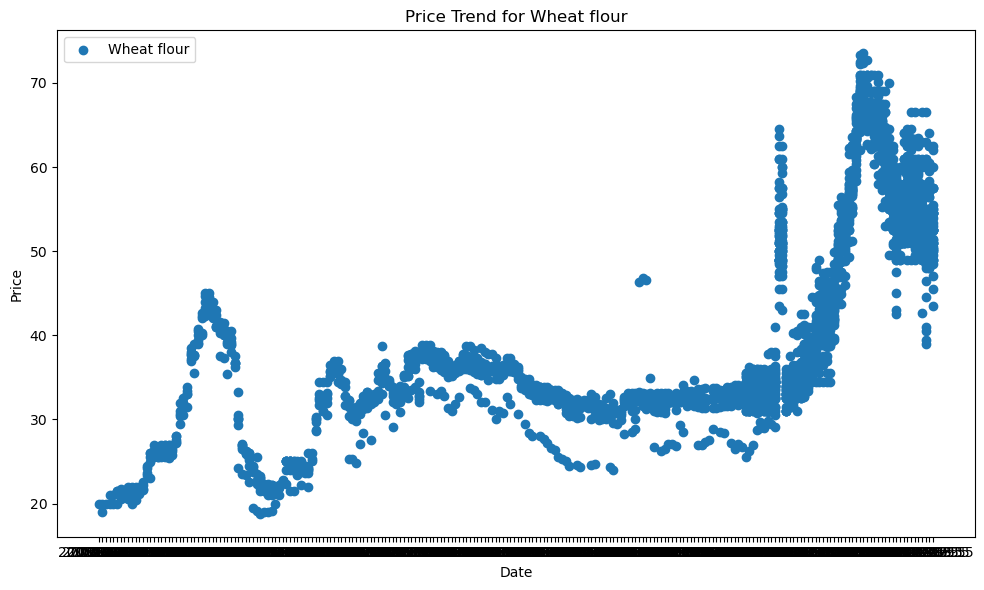

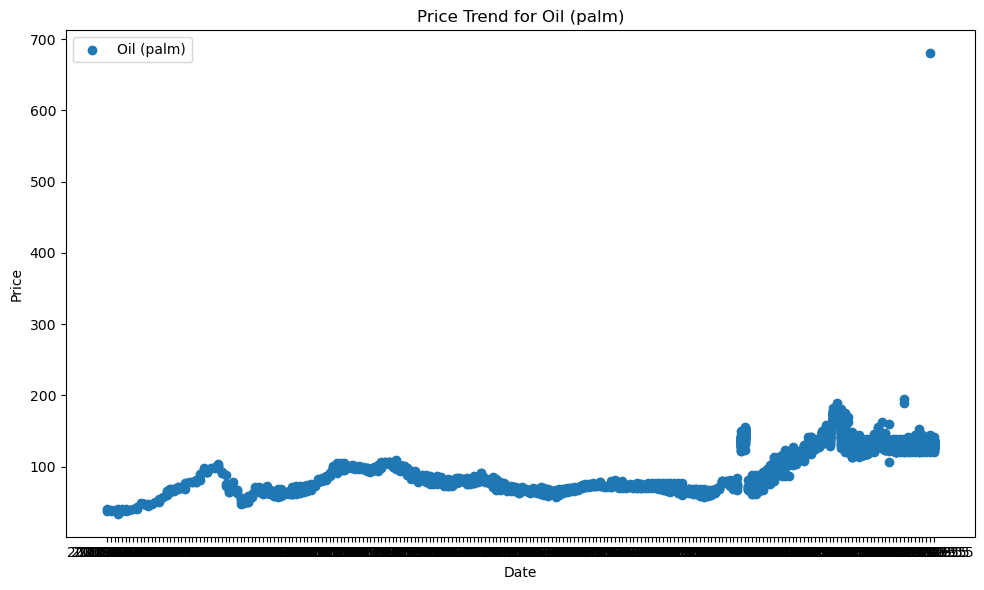

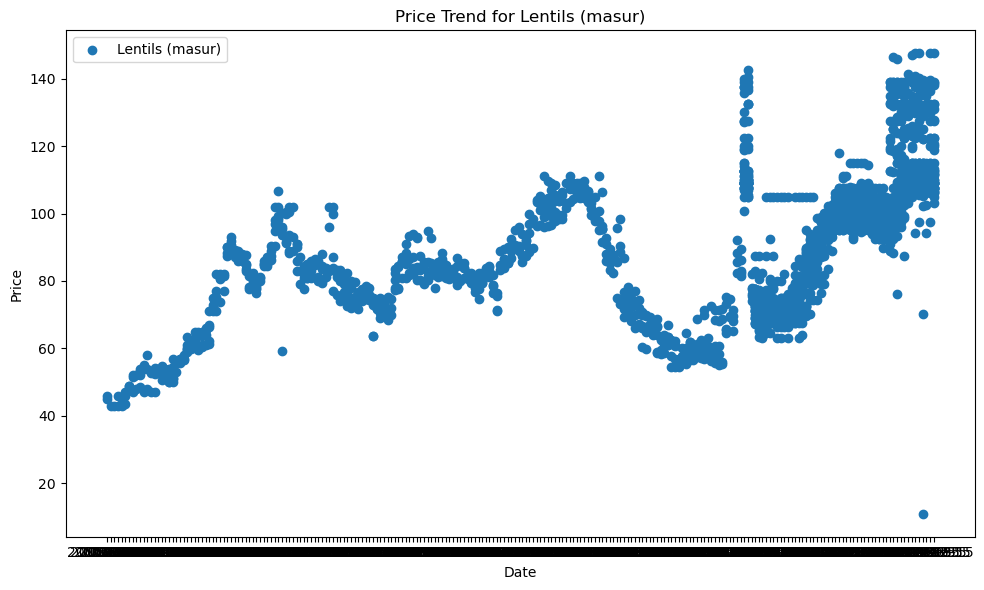

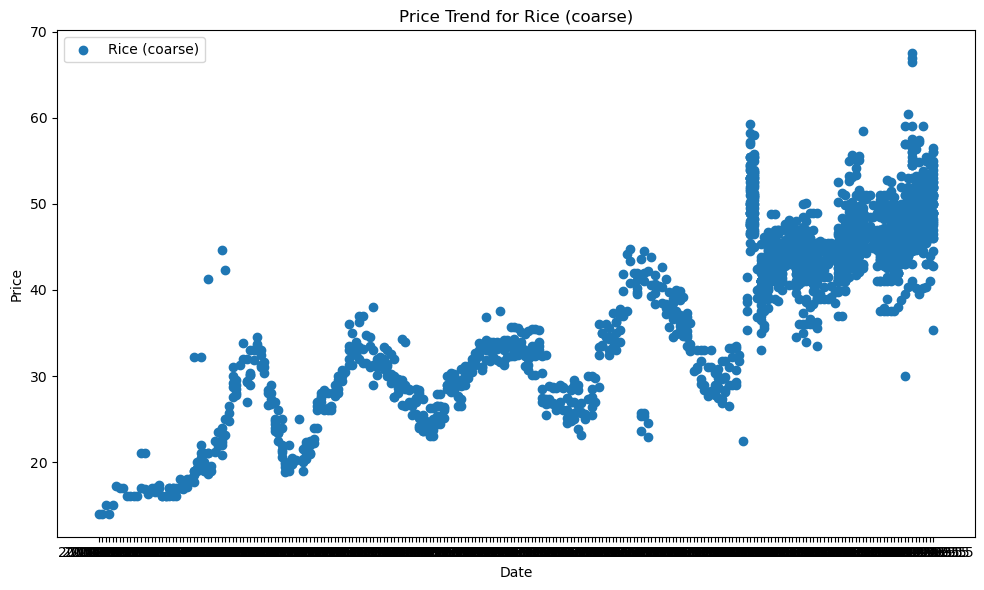

In [35]:

for commodity in selected_commodity_names:

    commodity_df = df[df['commodity'] == commodity]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(commodity_df['date'], commodity_df['price'], label=commodity)
    plt.title(f"Price Trend for {commodity}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    # plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [11]:
df.admin2.value_counts()

admin2
Dhaka          739
Chittagong     697
Khulna         649
Rajshahi       608
Barisal        594
              ... 
Jhenaidah       64
Madaripur       63
Chandpur        59
Narayanganj     57
Meherpur        54
Name: count, Length: 63, dtype: int64

In [12]:
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
109,2004-03-15,Dhaka,Dhaka,Dhaka Division,23.723056,90.408611,cereals and tubers,Rice (coarse),KG,actual,Retail,BDT,14.0,0.2446
112,2004-04-15,Dhaka,Dhaka,Dhaka Division,23.723056,90.408611,cereals and tubers,Rice (coarse),KG,actual,Retail,BDT,14.0,0.2447
119,2004-08-15,Dhaka,Dhaka,Dhaka Division,23.723056,90.408611,cereals and tubers,Rice (coarse),KG,actual,Retail,BDT,15.0,0.2519
122,2004-09-15,Dhaka,Dhaka,Dhaka Division,23.723056,90.408611,cereals and tubers,Rice (coarse),KG,actual,Retail,BDT,14.0,0.2430
124,2004-10-15,Dhaka,Dhaka,Dhaka Division,23.723056,90.408611,cereals and tubers,Rice (coarse),KG,actual,Retail,BDT,15.0,0.2598


In [13]:
df.drop(columns=['pricetype', 'usdprice', 'currency', 'category', 'admin1', 'market', 'latitude', 'longitude', 'priceflag'], inplace=True)

In [14]:
df = df.rename(columns={'admin2':'location'})

In [15]:
df.head()

,date,location,commodity,unit,price
109,2004-03-15,Dhaka,Rice (coarse),KG,14.0
112,2004-04-15,Dhaka,Rice (coarse),KG,14.0
119,2004-08-15,Dhaka,Rice (coarse),KG,15.0
122,2004-09-15,Dhaka,Rice (coarse),KG,14.0
124,2004-10-15,Dhaka,Rice (coarse),KG,15.0


In [16]:
df.to_csv('generated_data/food_pricing.csv', index=False)